In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [4]:
def p(img):
    plt.figure(figsize=(16,16))
    plt.imshow(img)
    plt.show()

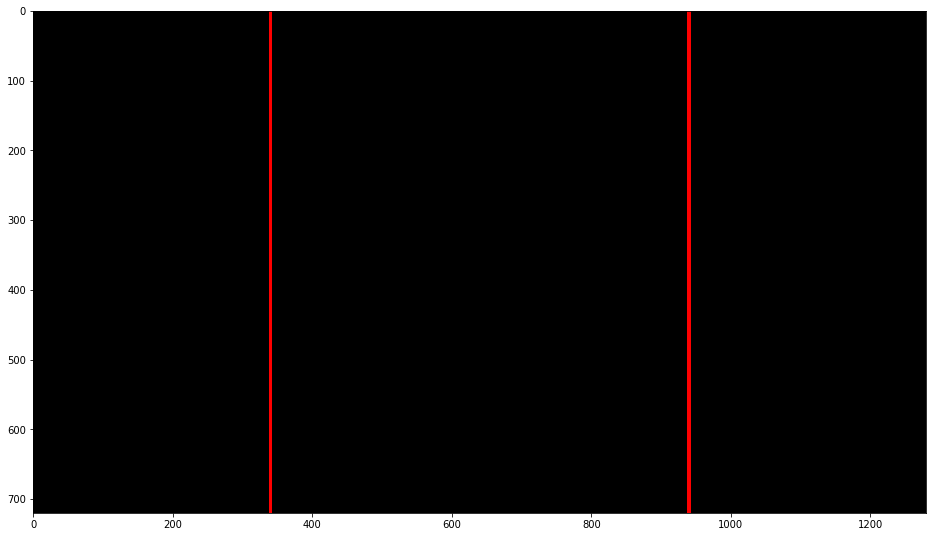

In [12]:
blank = np.zeros((720,1280,3)).astype(np.uint8)
line = cv2.line(blank, (1280//2 - 300, 0), (1280//2 - 300, 720), (255, 0, 0), 3)
line = cv2.line(line, (1280//2 + 300, 0), (1280//2 + 300, 720), (255, 0, 0), 3)
p(line)

In [32]:
def get_matrix(img, vanishing_pty):
    src = np.float32([
        [0, 0], 
        [0, img.shape[0]],
        [img.shape[1], img.shape[0]],
        [img.shape[1], 0]
    ])
    
    dst = np.float32([
        [img.shape[1]//2-20, vanishing_pty], 
        [0, img.shape[0]],
        [img.shape[1], img.shape[0]],
        [img.shape[1]//2+20, vanishing_pty]
    ])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M, Minv



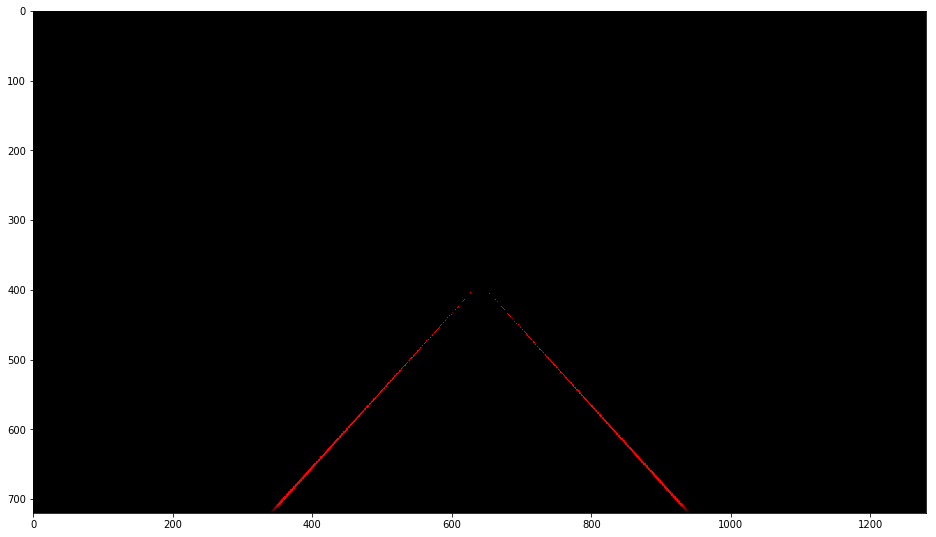

In [49]:
v_y = 400
Minv, M = get_matrix(line, v_y)
warped = cv2.warpPerspective(line, Minv, line.shape[:2][::-1])
p(warped)

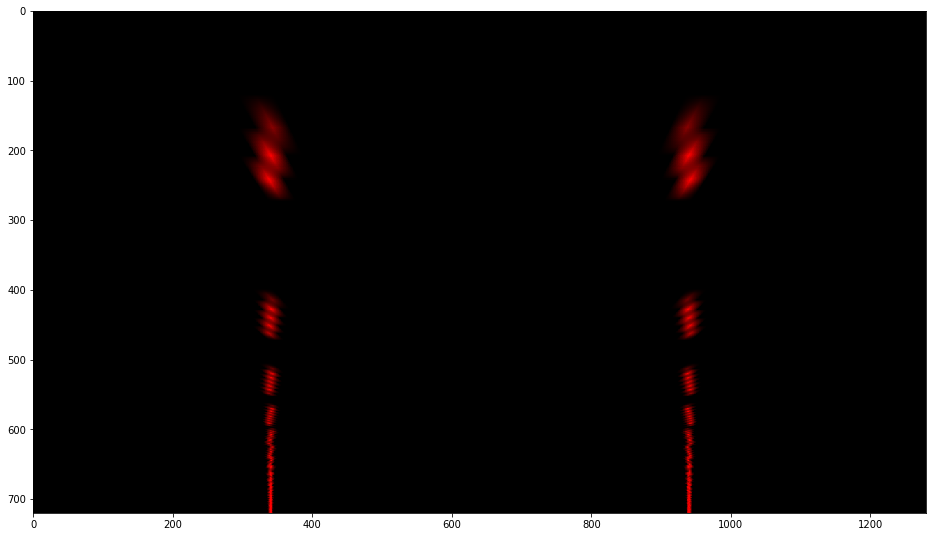

In [50]:
unwarped = cv2.warpPerspective(warped, M, line.shape[:2][::-1])
p(unwarped)

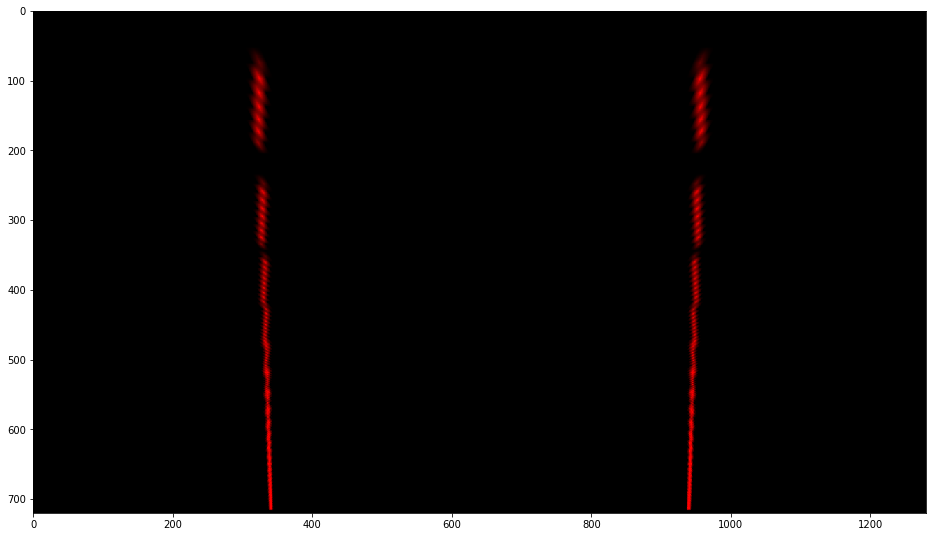

In [73]:
def get_matrix_2(img, vy, dy=20, correction=15):
    dst =  np.float32([
            [0, 0], 
            [0, img.shape[0]],
            [img.shape[1], img.shape[0]],
            [img.shape[1], 0]
        ])

    slope = (img.shape[0] - v_y) * 2.0 / img.shape[1]


    src = np.float32([
            [warped.shape[1]//2 - dy/slope - correction, v_y+dy], 
            [-dy/slope, warped.shape[0]+dy],
            [warped.shape[1]+dy/slope, warped.shape[0]+dy],
            [warped.shape[1]//2  + dy/slope + correction, v_y+dy]
        ])



    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M, Minv

M2, M2inv = get_matrix_2(warped, 400)

p(cv2.warpPerspective(warped, M2, warped.shape[:2][::-1]))

In [74]:
M

array([[ -8.47682119e-01,  -1.64238411e+00,   1.18251656e+03],
       [ -1.33226763e-14,  -1.90728477e+00,   7.62913907e+02],
       [ -2.08166817e-17,  -2.56622517e-03,   1.00000000e+00]])

In [75]:
M2

array([[ -8.36259698e-01,  -1.63331972e+00,   1.17520621e+03],
       [ -2.22044605e-15,  -1.99918334e+00,   8.39657003e+02],
       [ -6.50521303e-18,  -2.55206207e-03,   1.00000000e+00]])